In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Case vs Age

In [252]:
data = pd.read_csv('PatientInfo.csv')

In [253]:
data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [254]:
data.shape

(5165, 14)

In [255]:
# clean data: drop null if any and select necessary column ['sex','age']
data = data[data['country'] == 'Korea']
data = data[['sex', 'age']]
data = data.dropna().reset_index(drop=True)
data

,sex,age
0,male,50s
1,male,30s
2,male,50s
3,male,20s
4,female,20s
...,...,...
3739,female,20s
3740,male,30s
3741,female,20s
3742,female,30s


## 1. Male and Female Case vs Age

In [256]:
age_count = pd.DataFrame(data['age'].value_counts())
age_count.reset_index(level=0, inplace = True)
age_count.columns = ['age', 'counts']
age_count

,age,counts
0,20s,885
1,50s,665
2,40s,512
3,30s,510
4,60s,479
5,70s,231
6,10s,177
7,80s,170
8,0s,65
9,90s,49


In [257]:
def str_to_int(age):
    for i in range(0,age.shape[0]):
        age[i] = int(age[i][:-1])

In [258]:
# set age as int
str_to_int(age_count['age'])

<ipython-input-257-2acc7a4fde40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i] = int(age[i][:-1])


In [259]:
# sort age from 0 to 100
age_count = age_count.sort_values('age')
age_count

,age,counts
8,0,65
6,10,177
0,20,885
3,30,510
2,40,512
1,50,665
4,60,479
5,70,231
7,80,170
9,90,49


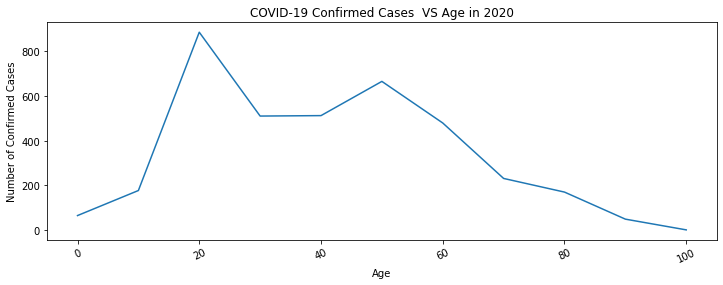

In [260]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Cases VS Age in 2020')
plt.xlabel('Age')
plt.ylabel('Number of Confirmed Cases')
plt.plot(age_count['age'],age_count['counts'])
plt.show()

## 2. Male Case vs Age

In [261]:
male_data = data[data['sex'] == 'male']
male_age_count = pd.DataFrame(male_data['age'].value_counts())
male_age_count.reset_index(level=0, inplace = True)
male_age_count.columns = ['age', 'counts']
male_age_count

,age,counts
0,20s,431
1,30s,273
2,50s,262
3,60s,211
4,40s,206
5,10s,110
6,70s,88
7,80s,56
8,0s,37
9,90s,16


In [262]:
# set age as int
str_to_int(male_age_count['age'])
# sort age from 0 to 90
male_age_count = male_age_count.sort_values('age')
male_age_count

<ipython-input-257-2acc7a4fde40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i] = int(age[i][:-1])


,age,counts
8,0,37
5,10,110
0,20,431
1,30,273
4,40,206
2,50,262
3,60,211
6,70,88
7,80,56
9,90,16


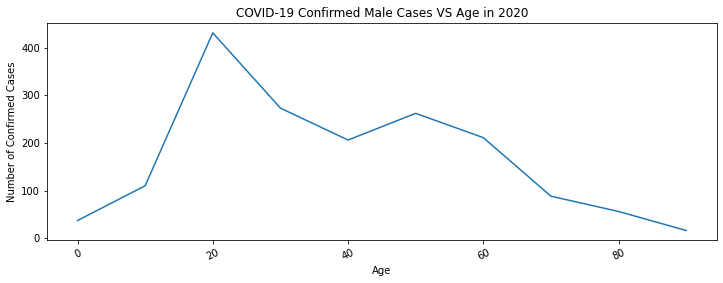

In [263]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Male Cases VS Age in 2020')
plt.xlabel('Age')
plt.ylabel('Number of Confirmed Cases')
plt.plot(male_age_count['age'],male_age_count['counts'])
plt.show()

## 3. Female Case vs Age

In [264]:
female_data = data[data['sex'] == 'female']
female_age_count = pd.DataFrame(female_data['age'].value_counts())
female_age_count.reset_index(level=0, inplace = True)
female_age_count.columns = ['age', 'counts']
female_age_count

,age,counts
0,20s,454
1,50s,403
2,40s,306
3,60s,268
4,30s,237
5,70s,143
6,80s,114
7,10s,67
8,90s,33
9,0s,28


In [265]:
# set age as int
str_to_int(female_age_count['age'])
# sort age from 0 to 100
female_age_count = female_age_count.sort_values('age')
female_age_count

<ipython-input-257-2acc7a4fde40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i] = int(age[i][:-1])


,age,counts
9,0,28
7,10,67
0,20,454
4,30,237
2,40,306
1,50,403
3,60,268
5,70,143
6,80,114
8,90,33


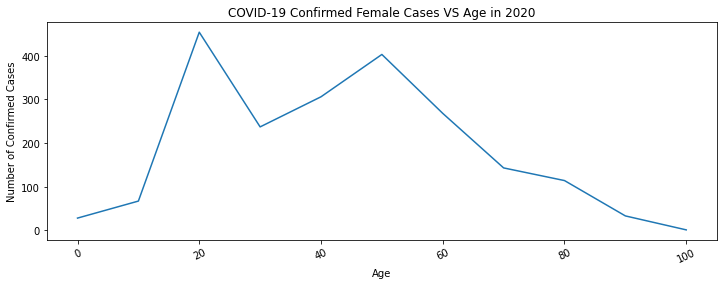

In [266]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Female Cases VS Age in 2020')
plt.xlabel('Age')
plt.ylabel('Number of Confirmed Cases')
plt.plot(female_age_count['age'],female_age_count['counts'])
plt.show()

## 4. Merge Into One Diagram

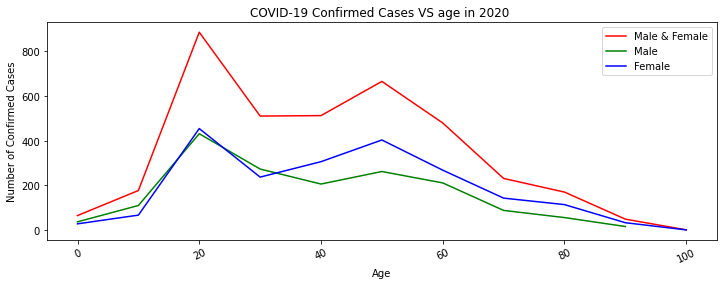

In [267]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Confirmed Cases VS Age in 2020 ')
plt.xlabel('Age')
plt.ylabel('Number of Confirmed Cases')
plt.plot(age_count['age'],age_count['counts'],'r')
plt.plot(male_age_count['age'],male_age_count['counts'],'g')
plt.plot(female_age_count['age'],female_age_count['counts'],'b')
plt.legend(['Male & Female','Male','Female'])
plt.show()

## 5. The Proportion of Patients of All Ages was Compared

In [268]:
# sum the number of cases for three diff ways
mf_case = age_count['counts'].sum()
m_case = male_age_count['counts'].sum()
f_case = female_age_count['counts'].sum()

In [276]:
# both male and female
age_count['proportion'] = (age_count['counts'] / mf_case) * 100
age_count['proportion'] = age_count['proportion'].round(decimals=2)
# male
male_age_count['proportion'] = (age_count['counts'] / mf_case) * 100
male_age_count['proportion'] = age_count['proportion'].round(decimals=2)
# female
female_age_count['proportion'] = (age_count['counts'] / mf_case) * 100
female_age_count['proportion'] = age_count['proportion'].round(decimals=2)

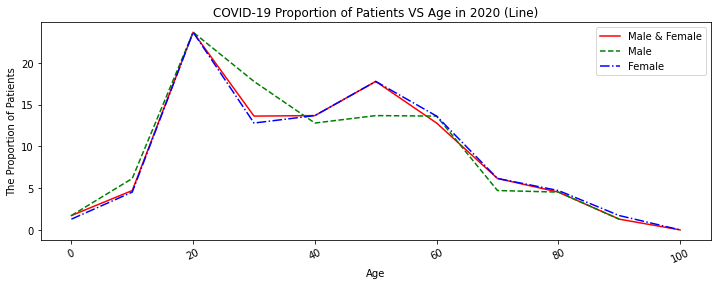

In [281]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Proportion of Patients VS Age in 2020 (Line)')
plt.xlabel('Age')
plt.ylabel('The Proportion of Patients')
plt.plot(age_count['age'],age_count['proportion'],'r')
plt.plot(male_age_count['age'],male_age_count['proportion'],'g--')
plt.plot(female_age_count['age'],female_age_count['proportion'],'b-.')
plt.legend(['Male & Female','Male','Female'])
plt.show()

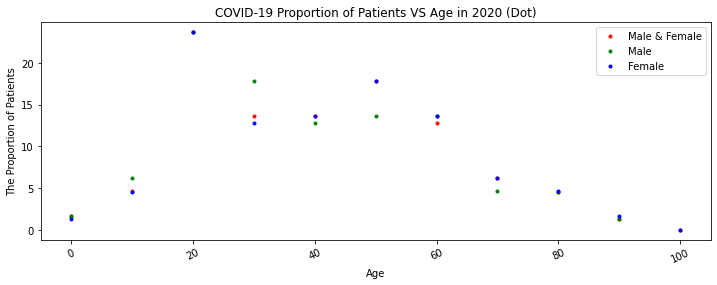

In [280]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('COVID-19 Proportion of Patients VS Age in 2020 (Dot)')
plt.xlabel('Age')
plt.ylabel('The Proportion of Patients')
plt.plot(age_count['age'],age_count['proportion'],'r.')
plt.plot(male_age_count['age'],male_age_count['proportion'],'g.')
plt.plot(female_age_count['age'],female_age_count['proportion'],'b.')
plt.legend(['Male & Female','Male','Female'])
plt.show()